In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as sts

In [2]:
test_file = 'Resources/owid-covid-data.csv'
test_file_df = pd.read_csv(test_file)
test_file_df.head()

,iso_code,continent,location,date,total_cases,new_cases,total_deaths,new_deaths,total_cases_per_million,new_cases_per_million,...,aged_70_older,gdp_per_capita,extreme_poverty,cvd_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy
0,AFG,Asia,Afghanistan,2019-12-31,0.0,0.0,0.0,0.0,0.0,0.0,...,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83
1,AFG,Asia,Afghanistan,2020-01-01,0.0,0.0,0.0,0.0,0.0,0.0,...,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83
2,AFG,Asia,Afghanistan,2020-01-02,0.0,0.0,0.0,0.0,0.0,0.0,...,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83
3,AFG,Asia,Afghanistan,2020-01-03,0.0,0.0,0.0,0.0,0.0,0.0,...,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83
4,AFG,Asia,Afghanistan,2020-01-04,0.0,0.0,0.0,0.0,0.0,0.0,...,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83


In [3]:
ddd = test_file_df[['continent', 'location', 'date', 'total_cases', 'total_deaths', 'cvd_death_rate', 'median_age', 'total_tests', 'gdp_per_capita', 'population', 'population_density', 'life_expectancy']]
ddd.head()

,continent,location,date,total_cases,total_deaths,cvd_death_rate,median_age,total_tests,gdp_per_capita,population,population_density,life_expectancy
0,Asia,Afghanistan,2019-12-31,0.0,0.0,597.029,18.6,NaN,1803.987,38928341.0,54.422,64.83
1,Asia,Afghanistan,2020-01-01,0.0,0.0,597.029,18.6,NaN,1803.987,38928341.0,54.422,64.83
2,Asia,Afghanistan,2020-01-02,0.0,0.0,597.029,18.6,NaN,1803.987,38928341.0,54.422,64.83
3,Asia,Afghanistan,2020-01-03,0.0,0.0,597.029,18.6,NaN,1803.987,38928341.0,54.422,64.83
4,Asia,Afghanistan,2020-01-04,0.0,0.0,597.029,18.6,NaN,1803.987,38928341.0,54.422,64.83


In [4]:
no_nan = ddd.dropna(how='any')

In [5]:
no_dup = no_nan.drop_duplicates(subset='location', keep='last')
no_dup_loc = no_dup.loc[(no_dup['location'] != "World") & (no_dup['location'] != "International"), :]
no_dup_loc.head()


,continent,location,date,total_cases,total_deaths,cvd_death_rate,median_age,total_tests,gdp_per_capita,population,population_density,life_expectancy
949,South America,Argentina,2020-06-25,49838.0,1085.0,191.032,31.9,309601.0,18933.907,45195777.0,16.177,76.67
1390,Oceania,Australia,2020-06-24,7492.0,102.0,107.791,37.9,2180424.0,44648.710,25499881.0,3.202,83.44
1569,Europe,Austria,2020-06-25,17384.0,693.0,145.183,44.4,584243.0,45436.686,9006400.0,106.749,81.54
2017,Asia,Bahrain,2020-06-25,23570.0,69.0,151.689,32.4,502763.0,43290.705,1701583.0,1935.907,77.29
2130,Asia,Bangladesh,2020-06-24,119198.0,1545.0,298.003,27.5,663444.0,3523.984,164689383.0,1265.036,72.59


In [6]:
no_dup_loc_1 = no_dup_loc.loc[no_dup_loc['date'] != "2020-04-29", :]
no_dup_loc_1.head()

,continent,location,date,total_cases,total_deaths,cvd_death_rate,median_age,total_tests,gdp_per_capita,population,population_density,life_expectancy
949,South America,Argentina,2020-06-25,49838.0,1085.0,191.032,31.9,309601.0,18933.907,45195777.0,16.177,76.67
1390,Oceania,Australia,2020-06-24,7492.0,102.0,107.791,37.9,2180424.0,44648.710,25499881.0,3.202,83.44
1569,Europe,Austria,2020-06-25,17384.0,693.0,145.183,44.4,584243.0,45436.686,9006400.0,106.749,81.54
2017,Asia,Bahrain,2020-06-25,23570.0,69.0,151.689,32.4,502763.0,43290.705,1701583.0,1935.907,77.29
2130,Asia,Bangladesh,2020-06-24,119198.0,1545.0,298.003,27.5,663444.0,3523.984,164689383.0,1265.036,72.59


In [7]:
sorted_df = no_dup_loc_1.sort_values("total_tests", ascending=False)
sorted_df.head()

,continent,location,date,total_cases,total_deaths,cvd_death_rate,median_age,total_tests,gdp_per_capita,population,population_density,life_expectancy
24860,North America,United States,2020-06-24,2347022.0,121228.0,151.089,38.3,28567355.0,54225.446,3.310026e+08,35.608,78.86
19731,Europe,Russia,2020-06-25,606881.0,8513.0,431.297,39.6,18115830.0,24765.954,1.459345e+08,8.823,72.58
11033,Asia,India,2020-06-25,473105.0,14894.0,282.280,28.2,7560782.0,6426.674,1.380004e+09,450.419,69.66
9182,Europe,Germany,2020-06-21,189822.0,8882.0,156.139,46.6,5412655.0,45229.245,8.378394e+07,237.016,81.33
12188,Europe,Italy,2020-06-25,239410.0,34644.0,113.151,47.9,5163154.0,35220.084,6.046183e+07,205.859,83.51


In [8]:
sorted_df_1 = sorted_df.iloc[:10, :]
sorted_df_1.head()

,continent,location,date,total_cases,total_deaths,cvd_death_rate,median_age,total_tests,gdp_per_capita,population,population_density,life_expectancy
24860,North America,United States,2020-06-24,2347022.0,121228.0,151.089,38.3,28567355.0,54225.446,3.310026e+08,35.608,78.86
19731,Europe,Russia,2020-06-25,606881.0,8513.0,431.297,39.6,18115830.0,24765.954,1.459345e+08,8.823,72.58
11033,Asia,India,2020-06-25,473105.0,14894.0,282.280,28.2,7560782.0,6426.674,1.380004e+09,450.419,69.66
9182,Europe,Germany,2020-06-21,189822.0,8882.0,156.139,46.6,5412655.0,45229.245,8.378394e+07,237.016,81.33
12188,Europe,Italy,2020-06-25,239410.0,34644.0,113.151,47.9,5163154.0,35220.084,6.046183e+07,205.859,83.51


In [9]:
list_tests = sorted_df_1['total_tests'].tolist()
print(len(list_tests))

x_axis = sorted_df_1['location'].tolist()
print(x_axis)
print(len(x_axis))

10
['United States', 'Russia', 'India', 'Germany', 'Italy', 'United Kingdom', 'Spain', 'Turkey', 'Canada', 'Australia']
10


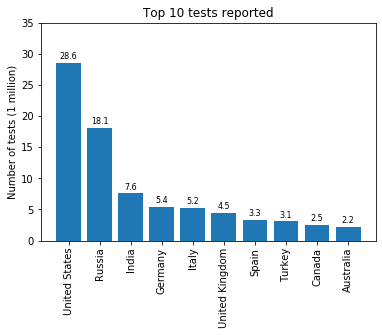

In [10]:
list_tests_2 = [round(x/1000000,1) for x in list_tests] ## zoom out 1 million
plt.bar(x_axis, list_tests_2) ## draw a bar 
plt.tight_layout
plt.xticks(rotation='vertical')
plt.yticks(range(0, 40,5)) ## set the y ticks 
plt.title('Top 10 tests reported')
plt.ylabel('Number of tests (1 million)') ## set y label and unit
for x,y in zip(x_axis, list_tests_2):
    ## draw data labels
    plt.text(x, y+0.3, str(y), ha='center', va='bottom', fontsize=8)

plt.savefig('Resources/Top_10_tests_reported_Bar.png',bbox_inches='tight')    
plt.show()
# Top Ten

In [11]:
list_cases = sorted_df_1['total_cases'].tolist()
# print(len(list_tests))

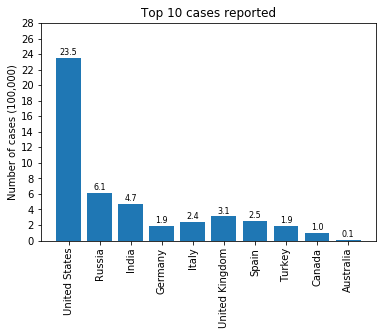

In [12]:
list_cases_2 = [round(x/100000,1) for x in list_cases] ## zoom out 1 million
plt.bar(x_axis, list_cases_2) ## draw bar 
plt.tight_layout
plt.xticks(rotation='vertical')
plt.yticks(np.arange(0, 30, 2)) ## set y ticks
plt.title('Top 10 cases reported')
plt.ylabel('Number of cases (100,000)')
for x,y in zip(x_axis, list_cases_2):
    ## draw data labels
    plt.text(x, y+0.1, str(y), ha='center', va='bottom', fontsize=8)

plt.savefig('Resources/Top_10_cases_reported_Bar.png', bbox_inches='tight')    
plt.show()


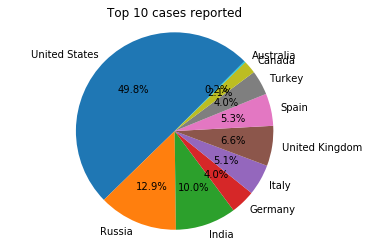

In [13]:
import matplotlib as mpl
plt.pie(list_cases_2, labels = x_axis, autopct="%1.1f%%", radius = 10800 , startangle = 45)
mpl.rcParams['font.size'] = 10
plt.axis('equal')
plt.title('Top 10 cases reported')
plt.savefig('Resources/Top_10_tests_reported_Pie.png', bbox_inches='tight')
plt.show()


In [14]:
# Data including China

data_w_china = ddd[['continent', 'location', 'date', 'total_cases', 'total_deaths', 'cvd_death_rate', 'median_age', 'gdp_per_capita', 'population', 'population_density', 'life_expectancy']]
no_nan_1 = data_w_china.dropna(how='any') # drop data with NaN
no_nan_1
no_dup_1 = no_nan_1.drop_duplicates(subset='location', keep='last') # drop duplicates
no_dup_1
no_dup_loc_1 = no_dup_1.loc[(no_dup_1['location'] != "World") & (no_dup_1['location'] != "International"), :] #data w/o world and international on 'location'
no_dup_loc_1
no_dup_loc_2 = no_dup_loc_1.loc[no_dup_loc_1['date'] != "2020-04-29", :] # data w/o vietnam
no_dup_loc_2

,continent,location,date,total_cases,total_deaths,cvd_death_rate,median_age,gdp_per_capita,population,population_density,life_expectancy
167,Asia,Afghanistan,2020-06-25,29715.0,639.0,597.029,18.6,1803.987,38928341.0,54.422,64.83
276,Europe,Albania,2020-06-25,2114.0,47.0,304.195,38.0,11803.431,2877800.0,104.871,78.57
449,Africa,Algeria,2020-06-25,12248.0,869.0,278.364,29.1,13913.839,43851043.0,17.348,76.88
649,Africa,Angola,2020-06-25,189.0,10.0,276.045,16.8,5819.495,32866268.0,23.890,61.15
838,North America,Antigua and Barbuda,2020-06-25,65.0,3.0,191.511,32.1,21490.943,97928.0,231.845,77.02
...,...,...,...,...,...,...,...,...,...,...,...
25364,South America,Venezuela,2020-06-25,4365.0,38.0,204.850,29.0,16745.022,28435943.0,36.253,72.06
25542,Asia,Vietnam,2020-06-25,352.0,0.0,245.465,32.6,6171.884,97338583.0,308.127,75.40
25680,Asia,Yemen,2020-06-25,1015.0,274.0,495.003,20.3,1479.147,29825968.0,53.508,66.12
25779,Africa,Zambia,2020-06-25,1489.0,18.0,234.499,17.7,3689.251,18383956.0,22.995,63.89


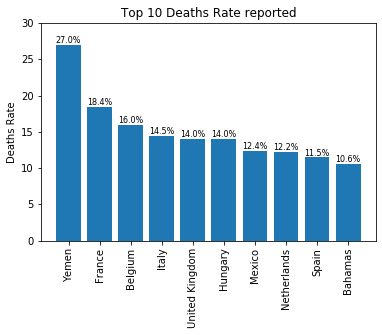

In [15]:

sorted_data = no_dup_loc_2.sort_values('total_deaths', ascending=False)
sorted_data['death_rate']= (sorted_data['total_deaths'] / sorted_data['total_cases'] ) * 100
sorted_data_1 = sorted_data.sort_values('death_rate', ascending=False)

df_death_10 = list(sorted_data_1['death_rate'].head(10) )
country_list = list(sorted_data_1['location'].head(10))

plt.bar(country_list, df_death_10)
plt.tight_layout
plt.xticks(rotation = 'vertical')
plt.title('Top 10 Deaths Rate reported')
plt.ylabel('Deaths Rate')
plt.ylim(0, 30)

for x,y in zip(country_list, df_death_10):
    plt.text(x, y, str(round(y,1)) + '%', ha='center', va='bottom', fontsize=8)

plt.savefig('Resources/Top_10_Death_Rate_Bar.png',bbox_inches='tight')
plt.show()

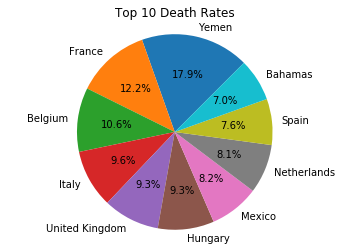

In [16]:
plt.pie(df_death_10, labels = country_list, autopct="%1.1f%%", radius = 10800 , startangle = 45)
mpl.rcParams['font.size'] = 10
plt.axis('equal')
plt.title('Top 10 Death Rates')
# plt.savefig('Resources/Top_10_tests_reported_Pie.png', bbox_inches='tight')
plt.show()

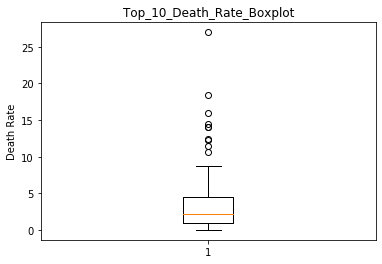

In [17]:
fig1, ax1 = plt.subplots()
ax1.boxplot(sorted_data_1['death_rate'])
ax1.set_ylabel('Death Rate')
# ax1.set_title('Death Rate')
plt.savefig('Resources/Top_10_Death_Rate_Boxplot.png')
plt.title('Top_10_Death_Rate_Boxplot')
plt.show()

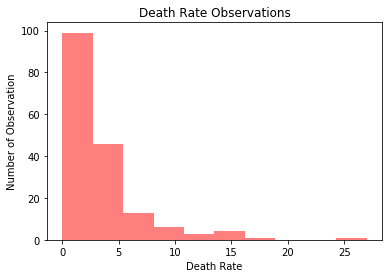

In [18]:
plt.hist(sorted_data_1['death_rate'], color='red', alpha=0.50)
plt.ylabel('Number of Observation')
plt.xlabel('Death Rate')
plt.title('Death Rate Observations')
plt.savefig('Resources/Death_Rate_Observations_Hist.png')
plt.show()

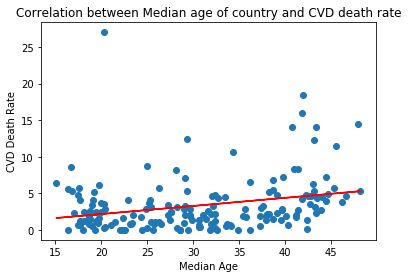

0.26815348870376815
0.07190629350400192


In [19]:
x_axis = no_dup_loc_2['median_age']
y_axis = (no_dup_loc_2['total_deaths'] / no_dup_loc_2['total_cases'] )*100

slope, intercept, rvalue, pvalue, stderror = sts.linregress(x_axis, y_axis)
regress = slope*x_axis + intercept

plt.scatter(x_axis, y_axis)
plt.xlabel('Median Age')
plt.ylabel('CVD Death Rate')
plt.title('Correlation between Median age of country and CVD death rate')
plt.plot(x_axis, regress, color='red')
plt.savefig('Resources/median_age_death_rate_scatter.png')
plt.show()
print(rvalue)
print(rvalue*rvalue)

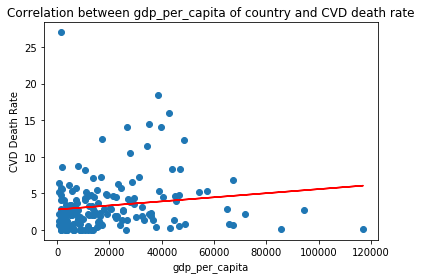

0.14553519402809018
0.021180492700793856


In [20]:
x_axis = no_dup_loc_2['gdp_per_capita']
y_axis = (no_dup_loc_2['total_deaths'] / no_dup_loc_2['total_cases'] )*100

slope, intercept, rvalue, pvalue, stderror = sts.linregress(x_axis, y_axis)
regress = slope*x_axis + intercept

plt.scatter(x_axis, y_axis)
plt.xlabel('gdp_per_capita')
plt.ylabel('CVD Death Rate')
plt.title('Correlation between gdp_per_capita of country and CVD death rate')
plt.plot(x_axis, regress, color='red')
plt.savefig('Resources/GDP_Death_Rate_scatter.png')
plt.show()
print(rvalue)
print(rvalue*rvalue)

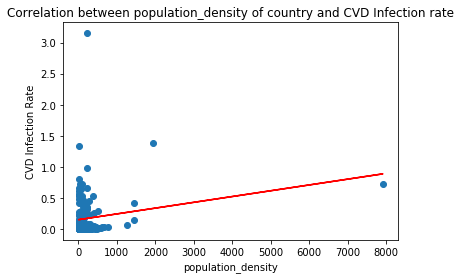

0.18211548952335654
0.03316605152433179


In [21]:
x_axis = no_dup_loc_2['population_density']
y_axis = (no_dup_loc_2['total_cases'] / no_dup_loc_2['population'] )*100

slope, intercept, rvalue, pvalue, stderror = sts.linregress(x_axis, y_axis)
regress = slope*x_axis + intercept

plt.scatter(x_axis, y_axis)
plt.xlabel('population_density')
plt.ylabel('CVD Infection Rate')
plt.title('Correlation between population_density of country and CVD Infection rate')
plt.plot(x_axis, regress, color='red')
plt.savefig('Resources/Population_density_infection_rate_scatter.png')
plt.show()
print(rvalue)
print(rvalue*rvalue)

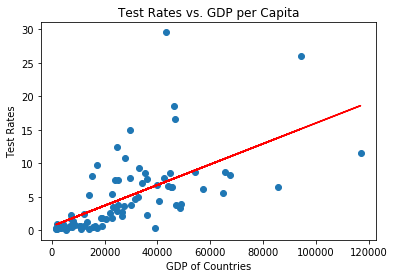

In [22]:
y_axis = (sorted_df['total_tests'] / sorted_df['population']) * 100
x_axis = sorted_df['gdp_per_capita']
plt.scatter(x_axis, y_axis)

slope, intercept, rvalue, pvalue, stderror = sts.linregress(x_axis, y_axis)
regress = slope*x_axis + intercept
plt.plot(x_axis, regress, color='red')
equation = "y=" + str(slope) + "x +" + str(intercept)
plt.xlabel('GDP of Countries')
plt.ylabel('Test Rates')
plt.title('Test Rates vs. GDP per Capita')
plt.savefig('Resources/Test_Rates_GDP_Scatter.png')
plt.show()

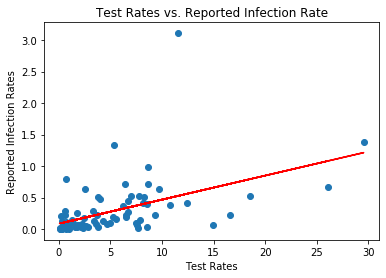

In [23]:
y_axis = (sorted_df['total_cases'] / sorted_df['population']) * 100
x_axis = (sorted_df['total_tests'] / sorted_df['population'] ) * 100
plt.scatter(x_axis, y_axis)
slope, intercept, rvalue, pvalue, stderror = sts.linregress(x_axis, y_axis)
regress = slope*x_axis + intercept
plt.plot(x_axis, regress, color='red')
plt.xlabel('Test Rates')
plt.ylabel('Reported Infection Rates')
plt.title('Test Rates vs. Reported Infection Rate')
plt.savefig('Resources/Test_Rates_Infection_Rate_Scatter.png')
plt.show()

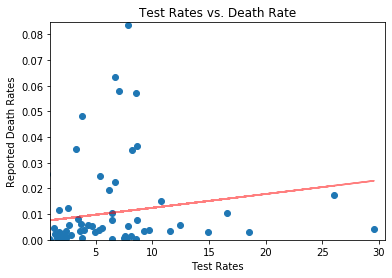

0.18276666280186607
0.03340365303173101


In [24]:
y_axis = (sorted_df['total_deaths'] / sorted_df['population']) * 100
x_axis = (sorted_df['total_tests'] / sorted_df['population'] ) * 100
plt.scatter(x_axis, y_axis)
slope, intercept, rvalue, pvalue, stderror = sts.linregress(x_axis, y_axis)
regress = slope*x_axis + intercept
plt.plot(x_axis, regress, color='red', alpha = 0.5)
plt.xlabel('Test Rates')
plt.ylabel('Reported Death Rates')
plt.title('Test Rates vs. Death Rate')
plt.xlim(1, max(x_axis) + 1 )
plt.ylim(0, max(y_axis)+0.001)
plt.savefig('Resources/Test_Rates_Death_Rate.png')
plt.show()
print(rvalue)
print(rvalue * rvalue)

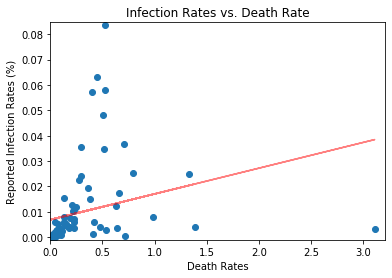

0.26882798517610423
0.07226848561384372
0.010148848203765807


In [28]:
y_axis = (sorted_df['total_deaths'] / sorted_df['population']) * 100
x_axis = (sorted_df['total_cases'] / sorted_df['population'] ) * 100
plt.scatter(x_axis, y_axis)
slope, intercept, rvalue, pvalue, stderror = sts.linregress(x_axis, y_axis)
regress = slope*x_axis + intercept
plt.plot(x_axis, regress, color='red', alpha = 0.5)
plt.xlabel('Death Rates')
plt.ylabel('Reported Infection Rates (%)')
plt.title('Infection Rates vs. Death Rate')
plt.xlim(0, max(x_axis) +0.1)
plt.ylim(-0.001, max(y_axis)+0.001)
plt.savefig('Resources/Death_Rate_Infection_Rate_scatter.png')
plt.show()
print(rvalue)
print(rvalue * rvalue)
print(slope)

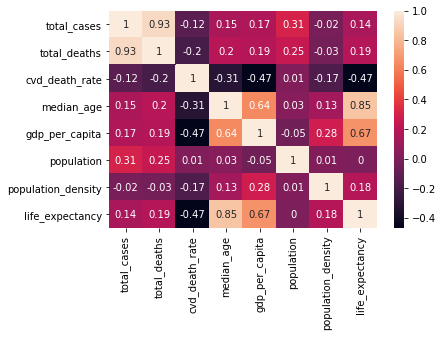

In [29]:
import seaborn as sn

matrix = round(no_dup_loc_2.corr(),2)
sn.heatmap(matrix, annot=True)
plt.savefig('Resources/Heatmap.png', bbox_inches='tight')
plt.show()

<IPython.core.display.Javascript object>


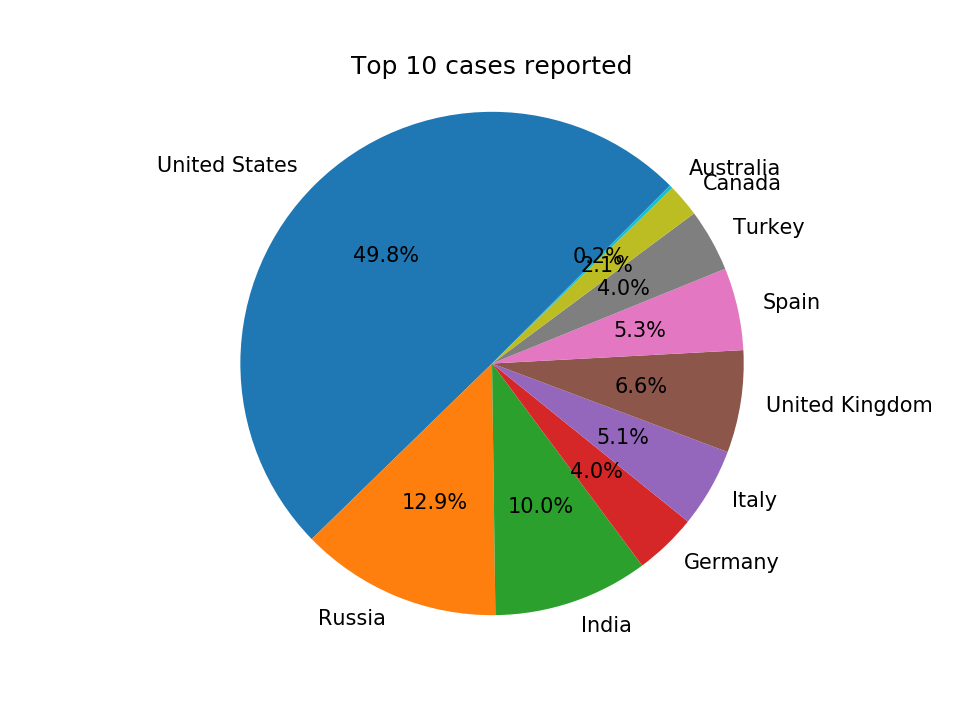

In [30]:
%matplotlib notebook
import matplotlib as mpl
x_axis = sorted_df_1['location'].tolist()
plt.pie(list_cases_2, labels = x_axis, autopct="%1.1f%%", radius = 10800 , startangle = 45)
mpl.rcParams['font.size'] = 10
plt.axis('equal')
plt.title('Top 10 cases reported')
plt.savefig('Resources/Top_10_tests_reported_Pie.png')
plt.show()

<IPython.core.display.Javascript object>


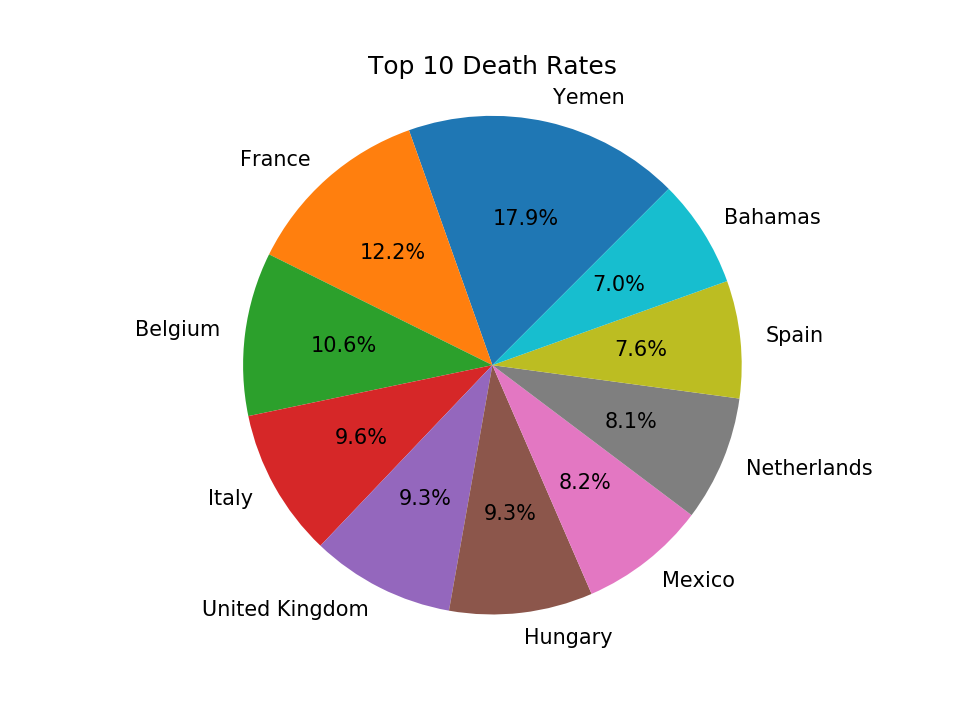

In [31]:
plt.pie(df_death_10, labels = country_list, autopct="%1.1f%%", radius = 10800 , startangle = 45)
mpl.rcParams['font.size'] = 10
plt.axis('equal')
plt.title('Top 10 Death Rates')
plt.savefig('Resources/Top_10_Death_Rate_Pie.png', bbox_inches='tight')
plt.show()